# 10-fold Cross validation example

In [1]:
"""
Choose the dataset name for the ground_truth and graph embeddings
"""
dataset_name = "openML"

"""
choose integer number of ratio negative/positive for the negative sampling (0 to 20)
"""
neg_sample = 2

"""
Choose experiment ["hold_out","random_subsam","10_cv"] : 
- hold_out will get the train/test split within ./ground_truth/dataset_name/hold_out
- random_subsam will isolate 1 node from some clusters of similar nodes in the ground truth. The isolated nodes will not be seen during training
- 10_cv: will split the ground truth in 10 folds, using each fold as test at least once. 
"""
strategy = "10_cv"

"""
Choose to use the selected strategy to create a new split 
or reuse a previously created one (useful to repeat exact same experiment)
"""
create_new_split = False

print("Env variables set")

#import libraries
import step3_gcnsm
from step3_gcnsm import confusion_matrix as confusion_matrix
from step3_gcnsm import train as train
from step3_gcnsm import cross_validation as cross_validation
from step3_gcnsm import test_mask, train_mask
from step3_gcnsm import g
import step3_gcn_nn_concatenate as gcn_nn
import step3_gcn_loss as gcn_loss
import step3_gcn_training as gcn_training
import step3_plot_results as plot
step3_gcnsm.load_env(ds_name=dataset_name,ns=neg_sample,experiment=strategy,new_split=create_new_split)
print("\n SETUP IS READY")

Env variables set


Using backend: pytorch


Values to load
dataset_name=openML
neg_sample= 2
strategy= 10_cv
create_new_split= True
cross_v= 0
Creating cross validation splits...


/home/pablo/gcnsm/step3v2/step3_train_test_split.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cv_pos = np.array(np.array_split(df_matching,10))
/home/pablo/gcnsm/step3v2/step3_train_test_split.py:84: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  cv_neg = np.array(np.array_split(df_not_matching,10))


CV Train/Test split done
Dataset splits loaded
Train positive samples: 488 Test positive samples: 55
Meta-feature graph from datasets loaded

 SETUP IS READY


# Choose NN architecture and loss function, then run tests

### Config and run training
### NN architectures: 

In [3]:
##run this to see the different options of NN architectures
gcn_nn.get_options()

{0: 'Bert2_400',
 1: 'Bert2_832',
 2: 'Bert2_832_400_200_100',
 3: 'Bert2_832_600_400_200',
 4: 'Bert_300',
 5: 'Bert_300_300_200',
 6: 'Bert_768',
 7: 'Fasttext2',
 8: 'Fasttext2_150',
 9: 'Fasttext2_200_200',
 10: 'Fasttext2_200_200_100',
 11: 'Fasttext2_200_200_200',
 12: 'Fasttext2_200_200_200_100',
 13: 'Fasttext2_200_200_200_100_relu',
 14: 'Fasttext2_300_250_200_150',
 15: 'Fasttext2_364',
 16: 'Fasttext2_364_200_100',
 17: 'Fasttext2_364_200_100_relu',
 18: 'Fasttext2_364_300_200_100',
 19: 'Fasttext2_364_300_200_100_relu',
 20: 'Fasttext2_364_300_250_200',
 21: 'Fasttext2_364_364_364',
 22: 'Fasttext2_364_nn',
 23: 'Fasttext2_3GCN_300_250_200_150',
 24: 'Fasttext2_728',
 25: 'Fasttext2_728364',
 26: 'Fasttext2_728_364',
 27: 'Fasttext2d_300_250_200_150',
 28: 'Fasttext2d_364',
 29: 'Fasttext2d_364_364_364',
 30: 'Fasttext2d_728_364',
 31: 'Fasttext3GCN_300',
 32: 'FasttextSum_150',
 33: 'FasttextSum_300_250_200_150',
 34: 'FasttextSum_364',
 35: 'FasttextSum_364_200_100',
 36:

### Loss functions: 
{<br>
    "0": "ContrastiveLoss", <br>
    "1": "CosineEmbeddingLoss", <br>
}

### Optimizer
{<br>
    "adam" (default)<br>
    "sgd"<br> 
}


### Loss functions parameters examples: format -> [margin]+[aggregation_function] 
{<br>
    0.9+mean, <br>
    0.7+mean, <br>
    0.5+mean, <br>
    0.3+mean, <br>
    0.9+sum, <br>
    0.7+sum, <br>
    0.5+sum, <br>
    0.3+sum, <br>
}

### batch_splits examples: 
{<br>
    1024, <br>
    2048, <br>
}
### learning rate examples (lr): 
{<br>
    6e-3, <br>
    1e-2, <br>
}

### 10-fold Cross Validation run example

In [2]:
#train new model and specify parameters
training_object = gcn_training.Training()
training_object.set_training(
            net_name= "Fasttext2_364",  #_of_option for NN architecture
            batch_splits=1024 ,#_of_sets(this will (give dataset / batch_splits) size of batch
            lr=1e-2 , #learning rate for training (e.g. 1e-3 )
            loss_name=gcn_loss.get_option_name(1), #_of_option for loss 
            loss_parameters="0.5+mean" ,#loss function parameters separated by '+' e.g. for cosine and contrastive "0.0+mean"
            optimizer_name="sgd" ) #adam or sgd, default adam

cross_validation(training_object,120,"1-10",nsample=2)

Values to load
dataset_name=openML
neg_sample= 0
strategy= 10_cv
create_new_split= False
cross_v= 0
Dataset splits loaded
Train positive samples: 488 Test positive samples: 55
Meta-feature graph from datasets loaded
Start of training...NN Fasttext2_364 Loss CosineEmbeddingLoss Split 1024: 
Ep:0, loss:0.00061, loss_test:0.24363, lr:1.00e-02, fs:0.66667 (r=1.000,p=0.500),  time:6.217, tt:6.217
##########Best model found so far##########
Ep:1, loss:0.00061, loss_test:0.24147, lr:9.90e-03, fs:0.66667 (r=1.000,p=0.500),  time:6.118, tt:12.236
Ep:2, loss:0.00059, loss_test:0.23675, lr:9.80e-03, fs:0.66667 (r=1.000,p=0.500),  time:6.121, tt:18.363
Ep:3, loss:0.00056, loss_test:0.22672, lr:9.70e-03, fs:0.66667 (r=1.000,p=0.500),  time:6.058, tt:24.231
Ep:4, loss:0.00051, loss_test:0.20540, lr:9.61e-03, fs:0.65854 (r=0.982,p=0.495),  time:6.017, tt:30.084
Ep:5, loss:0.00040, loss_test:0.19341, lr:9.51e-03, fs:0.69444 (r=0.909,p=0.562),  time:6.016, tt:36.094
##########Best model found so far###

Ep:68, loss:0.00004, loss_test:0.05292, lr:5.05e-03, fs:0.94545 (r=0.945,p=0.945),  time:6.222, tt:429.325
Ep:69, loss:0.00004, loss_test:0.04959, lr:5.00e-03, fs:0.95495 (r=0.964,p=0.946),  time:6.219, tt:435.340
##########Best model found so far##########
Ep:70, loss:0.00004, loss_test:0.04832, lr:4.95e-03, fs:0.93694 (r=0.945,p=0.929),  time:6.217, tt:441.434
Ep:71, loss:0.00004, loss_test:0.04982, lr:4.90e-03, fs:0.92857 (r=0.945,p=0.912),  time:6.210, tt:447.096
Ep:72, loss:0.00004, loss_test:0.04754, lr:4.85e-03, fs:0.92857 (r=0.945,p=0.912),  time:6.209, tt:453.281
Ep:73, loss:0.00004, loss_test:0.04661, lr:4.80e-03, fs:0.94545 (r=0.945,p=0.945),  time:6.204, tt:459.124
Ep:74, loss:0.00004, loss_test:0.04983, lr:4.75e-03, fs:0.93694 (r=0.945,p=0.929),  time:6.200, tt:464.982
Ep:75, loss:0.00003, loss_test:0.04720, lr:4.71e-03, fs:0.94545 (r=0.945,p=0.945),  time:6.196, tt:470.867
Ep:76, loss:0.00003, loss_test:0.04626, lr:4.66e-03, fs:0.94545 (r=0.945,p=0.945),  time:6.193, tt:4

Ep:18, loss:0.00021, loss_test:0.12423, lr:8.35e-03, fs:0.86400 (r=0.982,p=0.771),  time:6.047, tt:114.886
Ep:19, loss:0.00021, loss_test:0.12436, lr:8.26e-03, fs:0.87805 (r=0.982,p=0.794),  time:6.032, tt:120.638
Ep:20, loss:0.00020, loss_test:0.12216, lr:8.18e-03, fs:0.85714 (r=0.982,p=0.761),  time:6.045, tt:126.938
Ep:21, loss:0.00020, loss_test:0.11588, lr:8.10e-03, fs:0.85938 (r=1.000,p=0.753),  time:6.029, tt:132.640
Ep:22, loss:0.00019, loss_test:0.11356, lr:8.02e-03, fs:0.88525 (r=0.982,p=0.806),  time:6.038, tt:138.878
Ep:23, loss:0.00018, loss_test:0.10792, lr:7.94e-03, fs:0.87097 (r=0.982,p=0.783),  time:6.169, tt:148.056
Ep:24, loss:0.00018, loss_test:0.10414, lr:7.86e-03, fs:0.90000 (r=0.982,p=0.831),  time:6.334, tt:158.344
##########Best model found so far##########
Ep:25, loss:0.00017, loss_test:0.09587, lr:7.78e-03, fs:0.88000 (r=1.000,p=0.786),  time:6.349, tt:165.064
Ep:26, loss:0.00016, loss_test:0.09384, lr:7.70e-03, fs:0.90164 (r=1.000,p=0.821),  time:6.348, tt:1

Ep:92, loss:0.00002, loss_test:0.02254, lr:3.97e-03, fs:0.97345 (r=1.000,p=0.948),  time:6.310, tt:586.845
Ep:93, loss:0.00002, loss_test:0.02446, lr:3.93e-03, fs:0.98214 (r=1.000,p=0.965),  time:6.306, tt:592.740
Ep:94, loss:0.00002, loss_test:0.02198, lr:3.89e-03, fs:0.97345 (r=1.000,p=0.948),  time:6.303, tt:598.791
Ep:95, loss:0.00002, loss_test:0.02148, lr:3.85e-03, fs:0.98214 (r=1.000,p=0.965),  time:6.300, tt:604.820
Ep:96, loss:0.00002, loss_test:0.02091, lr:3.81e-03, fs:0.98214 (r=1.000,p=0.965),  time:6.300, tt:611.060
Ep:97, loss:0.00002, loss_test:0.02327, lr:3.77e-03, fs:0.97345 (r=1.000,p=0.948),  time:6.292, tt:616.645
Ep:98, loss:0.00002, loss_test:0.02122, lr:3.73e-03, fs:0.97345 (r=1.000,p=0.948),  time:6.288, tt:622.555
Ep:99, loss:0.00002, loss_test:0.01841, lr:3.70e-03, fs:0.97345 (r=1.000,p=0.948),  time:6.283, tt:628.311
Ep:100, loss:0.00002, loss_test:0.01714, lr:3.66e-03, fs:0.98214 (r=1.000,p=0.965),  time:6.281, tt:634.359
Ep:101, loss:0.00002, loss_test:0.01

Ep:39, loss:0.00011, loss_test:0.10937, lr:6.76e-03, fs:0.90756 (r=0.982,p=0.844),  time:6.293, tt:251.714
Ep:40, loss:0.00011, loss_test:0.10938, lr:6.69e-03, fs:0.87931 (r=0.927,p=0.836),  time:6.276, tt:257.299
Ep:41, loss:0.00011, loss_test:0.10498, lr:6.62e-03, fs:0.91667 (r=1.000,p=0.846),  time:6.258, tt:262.848
##########Best model found so far##########
Ep:42, loss:0.00011, loss_test:0.09718, lr:6.56e-03, fs:0.91667 (r=1.000,p=0.846),  time:6.238, tt:268.235
Ep:43, loss:0.00010, loss_test:0.09732, lr:6.49e-03, fs:0.90164 (r=1.000,p=0.821),  time:6.236, tt:274.371
Ep:44, loss:0.00010, loss_test:0.09633, lr:6.43e-03, fs:0.89831 (r=0.964,p=0.841),  time:6.224, tt:280.058
Ep:45, loss:0.00010, loss_test:0.09339, lr:6.36e-03, fs:0.90756 (r=0.982,p=0.844),  time:6.199, tt:285.163
Ep:46, loss:0.00009, loss_test:0.09156, lr:6.30e-03, fs:0.90909 (r=1.000,p=0.833),  time:6.189, tt:290.903
Ep:47, loss:0.00009, loss_test:0.08887, lr:6.24e-03, fs:0.91525 (r=0.982,p=0.857),  time:6.174, tt:2

Ep:114, loss:0.00001, loss_test:0.02088, lr:3.18e-03, fs:0.94643 (r=0.964,p=0.930),  time:6.287, tt:723.019
Ep:115, loss:0.00001, loss_test:0.02181, lr:3.15e-03, fs:0.94643 (r=0.964,p=0.930),  time:6.292, tt:729.856
Ep:116, loss:0.00001, loss_test:0.02265, lr:3.12e-03, fs:0.93805 (r=0.964,p=0.914),  time:6.292, tt:736.118
Ep:117, loss:0.00001, loss_test:0.02187, lr:3.09e-03, fs:0.94643 (r=0.964,p=0.930),  time:6.290, tt:742.234
Ep:118, loss:0.00001, loss_test:0.02107, lr:3.05e-03, fs:0.94643 (r=0.964,p=0.930),  time:6.291, tt:748.586
Ep:119, loss:0.00001, loss_test:0.02223, lr:3.02e-03, fs:0.93805 (r=0.964,p=0.914),  time:6.287, tt:754.398
Model and results saved
Saving best model...
Model and results saved
Values to load
dataset_name=openML
neg_sample= 0
strategy= 10_cv
create_new_split= False
cross_v= 3
Dataset splits loaded
Train positive samples: 489 Test positive samples: 54
Meta-feature graph from datasets loaded
Start of training...NN Fasttext2_364 Loss CosineEmbeddingLoss Split

/home/pablo/gcnsm/step3v2/step3_gcnsm.py:308: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(result)


Ep:0, loss:0.00061, loss_test:0.24676, lr:1.00e-02, fs:0.66667 (r=1.000,p=0.500),  time:5.941, tt:5.941
##########Best model found so far##########
Ep:1, loss:0.00061, loss_test:0.24562, lr:9.90e-03, fs:0.66667 (r=1.000,p=0.500),  time:5.934, tt:11.869
Ep:2, loss:0.00059, loss_test:0.24308, lr:9.80e-03, fs:0.66667 (r=1.000,p=0.500),  time:5.867, tt:17.600
Ep:3, loss:0.00056, loss_test:0.23733, lr:9.70e-03, fs:0.66667 (r=1.000,p=0.500),  time:5.866, tt:23.463
Ep:4, loss:0.00050, loss_test:0.22586, lr:9.61e-03, fs:0.64968 (r=0.944,p=0.495),  time:5.800, tt:28.999
Ep:5, loss:0.00040, loss_test:0.21580, lr:9.51e-03, fs:0.63448 (r=0.852,p=0.505),  time:5.783, tt:34.698
Ep:6, loss:0.00032, loss_test:0.20933, lr:9.41e-03, fs:0.64615 (r=0.778,p=0.553),  time:5.773, tt:40.414
Ep:7, loss:0.00031, loss_test:0.20594, lr:9.32e-03, fs:0.64957 (r=0.704,p=0.603),  time:5.857, tt:46.854
Ep:8, loss:0.00029, loss_test:0.20064, lr:9.23e-03, fs:0.65600 (r=0.759,p=0.577),  time:5.845, tt:52.609
Ep:9, loss:0

Ep:68, loss:0.00005, loss_test:0.04044, lr:5.05e-03, fs:0.96429 (r=1.000,p=0.931),  time:5.968, tt:411.811
Ep:69, loss:0.00005, loss_test:0.04178, lr:5.00e-03, fs:0.96364 (r=0.981,p=0.946),  time:5.958, tt:417.078
Ep:70, loss:0.00005, loss_test:0.04097, lr:4.95e-03, fs:0.96429 (r=1.000,p=0.931),  time:5.967, tt:423.653
Ep:71, loss:0.00005, loss_test:0.03794, lr:4.90e-03, fs:0.96429 (r=1.000,p=0.931),  time:5.967, tt:429.655
Ep:72, loss:0.00004, loss_test:0.03677, lr:4.85e-03, fs:0.95575 (r=1.000,p=0.915),  time:5.967, tt:435.565
Ep:73, loss:0.00004, loss_test:0.03620, lr:4.80e-03, fs:0.97297 (r=1.000,p=0.947),  time:5.970, tt:441.771
Ep:74, loss:0.00005, loss_test:0.03676, lr:4.75e-03, fs:0.97297 (r=1.000,p=0.947),  time:5.969, tt:447.644
Ep:75, loss:0.00004, loss_test:0.03358, lr:4.71e-03, fs:0.97297 (r=1.000,p=0.947),  time:6.009, tt:456.675
Ep:76, loss:0.00004, loss_test:0.03308, lr:4.66e-03, fs:0.98182 (r=1.000,p=0.964),  time:6.028, tt:464.169
##########Best model found so far####

Ep:18, loss:0.00022, loss_test:0.15192, lr:8.35e-03, fs:0.79365 (r=0.926,p=0.694),  time:6.013, tt:114.254
Ep:19, loss:0.00021, loss_test:0.14963, lr:8.26e-03, fs:0.79365 (r=0.926,p=0.694),  time:5.994, tt:119.876
Ep:20, loss:0.00020, loss_test:0.14520, lr:8.18e-03, fs:0.79365 (r=0.926,p=0.694),  time:5.958, tt:125.125
Ep:21, loss:0.00020, loss_test:0.14309, lr:8.10e-03, fs:0.77165 (r=0.907,p=0.671),  time:5.949, tt:130.879
Ep:22, loss:0.00019, loss_test:0.13254, lr:8.02e-03, fs:0.81301 (r=0.926,p=0.725),  time:5.958, tt:137.044
##########Best model found so far##########
Ep:23, loss:0.00018, loss_test:0.13133, lr:7.94e-03, fs:0.81967 (r=0.926,p=0.735),  time:5.933, tt:142.390
##########Best model found so far##########
Ep:24, loss:0.00018, loss_test:0.13141, lr:7.86e-03, fs:0.82645 (r=0.926,p=0.746),  time:5.922, tt:148.059
##########Best model found so far##########
Ep:25, loss:0.00017, loss_test:0.12810, lr:7.78e-03, fs:0.80645 (r=0.926,p=0.714),  time:5.905, tt:153.529
Ep:26, loss:

Ep:90, loss:0.00003, loss_test:0.02933, lr:4.05e-03, fs:0.96429 (r=1.000,p=0.931),  time:6.210, tt:565.125
##########Best model found so far##########
Ep:91, loss:0.00003, loss_test:0.02784, lr:4.01e-03, fs:0.93913 (r=1.000,p=0.885),  time:6.207, tt:571.019
Ep:92, loss:0.00002, loss_test:0.02528, lr:3.97e-03, fs:0.95575 (r=1.000,p=0.915),  time:6.207, tt:577.257
Ep:93, loss:0.00003, loss_test:0.02636, lr:3.93e-03, fs:0.95575 (r=1.000,p=0.915),  time:6.207, tt:583.425
Ep:94, loss:0.00003, loss_test:0.02451, lr:3.89e-03, fs:0.95575 (r=1.000,p=0.915),  time:6.207, tt:589.681
Ep:95, loss:0.00002, loss_test:0.02345, lr:3.85e-03, fs:0.95575 (r=1.000,p=0.915),  time:6.206, tt:595.775
Ep:96, loss:0.00002, loss_test:0.02440, lr:3.81e-03, fs:0.94737 (r=1.000,p=0.900),  time:6.210, tt:602.381
Ep:97, loss:0.00002, loss_test:0.02294, lr:3.77e-03, fs:0.95575 (r=1.000,p=0.915),  time:6.209, tt:608.525
Ep:98, loss:0.00002, loss_test:0.02269, lr:3.73e-03, fs:0.95575 (r=1.000,p=0.915),  time:6.212, tt:6

Ep:37, loss:0.00012, loss_test:0.08967, lr:6.89e-03, fs:0.85950 (r=0.963,p=0.776),  time:6.432, tt:244.422
Ep:38, loss:0.00011, loss_test:0.08877, lr:6.83e-03, fs:0.87179 (r=0.944,p=0.810),  time:6.414, tt:250.147
Ep:39, loss:0.00011, loss_test:0.08721, lr:6.76e-03, fs:0.86726 (r=0.907,p=0.831),  time:6.395, tt:255.799
Ep:40, loss:0.00010, loss_test:0.08799, lr:6.69e-03, fs:0.86726 (r=0.907,p=0.831),  time:6.376, tt:261.415
Ep:41, loss:0.00011, loss_test:0.08368, lr:6.62e-03, fs:0.86179 (r=0.981,p=0.768),  time:6.340, tt:266.294
Ep:42, loss:0.00010, loss_test:0.08237, lr:6.56e-03, fs:0.89091 (r=0.907,p=0.875),  time:6.381, tt:274.391
##########Best model found so far##########
Ep:43, loss:0.00010, loss_test:0.07733, lr:6.49e-03, fs:0.89076 (r=0.981,p=0.815),  time:6.422, tt:282.560
Ep:44, loss:0.00010, loss_test:0.08187, lr:6.43e-03, fs:0.88496 (r=0.926,p=0.847),  time:6.435, tt:289.570
Ep:45, loss:0.00009, loss_test:0.07274, lr:6.36e-03, fs:0.86667 (r=0.963,p=0.788),  time:6.422, tt:2

Ep:111, loss:0.00001, loss_test:0.02653, lr:3.28e-03, fs:0.96296 (r=0.963,p=0.963),  time:6.302, tt:705.832
Ep:112, loss:0.00001, loss_test:0.02609, lr:3.24e-03, fs:0.96296 (r=0.963,p=0.963),  time:6.298, tt:711.633
Ep:113, loss:0.00001, loss_test:0.02694, lr:3.21e-03, fs:0.96296 (r=0.963,p=0.963),  time:6.290, tt:717.025
Ep:114, loss:0.00001, loss_test:0.02648, lr:3.18e-03, fs:0.96296 (r=0.963,p=0.963),  time:6.283, tt:722.496
Ep:115, loss:0.00001, loss_test:0.02568, lr:3.15e-03, fs:0.96296 (r=0.963,p=0.963),  time:6.273, tt:727.645
Ep:116, loss:0.00001, loss_test:0.02690, lr:3.12e-03, fs:0.95413 (r=0.963,p=0.945),  time:6.263, tt:732.730
Ep:117, loss:0.00001, loss_test:0.02646, lr:3.09e-03, fs:0.96296 (r=0.963,p=0.963),  time:6.256, tt:738.214
Ep:118, loss:0.00001, loss_test:0.02574, lr:3.05e-03, fs:0.96296 (r=0.963,p=0.963),  time:6.249, tt:743.684
Ep:119, loss:0.00001, loss_test:0.02542, lr:3.02e-03, fs:0.96296 (r=0.963,p=0.963),  time:6.248, tt:749.743
Model and results saved
Savi

Ep:56, loss:0.00007, loss_test:0.04698, lr:5.70e-03, fs:0.93805 (r=0.981,p=0.898),  time:6.375, tt:363.385
Ep:57, loss:0.00006, loss_test:0.04528, lr:5.64e-03, fs:0.98148 (r=0.981,p=0.981),  time:6.382, tt:370.141
Ep:58, loss:0.00006, loss_test:0.04273, lr:5.58e-03, fs:0.95495 (r=0.981,p=0.930),  time:6.365, tt:375.517
Ep:59, loss:0.00006, loss_test:0.04704, lr:5.53e-03, fs:0.93805 (r=0.981,p=0.898),  time:6.349, tt:380.913
Ep:60, loss:0.00005, loss_test:0.04222, lr:5.47e-03, fs:0.96364 (r=0.981,p=0.946),  time:6.336, tt:386.522
Ep:61, loss:0.00006, loss_test:0.04076, lr:5.42e-03, fs:0.98148 (r=0.981,p=0.981),  time:6.326, tt:392.218
Ep:62, loss:0.00005, loss_test:0.04332, lr:5.36e-03, fs:0.94643 (r=0.981,p=0.914),  time:6.308, tt:397.394
Ep:63, loss:0.00005, loss_test:0.03954, lr:5.31e-03, fs:0.95495 (r=0.981,p=0.930),  time:6.302, tt:403.297
Ep:64, loss:0.00005, loss_test:0.04090, lr:5.26e-03, fs:0.94643 (r=0.981,p=0.914),  time:6.288, tt:408.745
Ep:65, loss:0.00005, loss_test:0.0413

Ep:9, loss:0.00029, loss_test:0.20085, lr:9.14e-03, fs:0.64286 (r=0.667,p=0.621),  time:6.783, tt:67.831
Ep:10, loss:0.00028, loss_test:0.19879, lr:9.04e-03, fs:0.63551 (r=0.630,p=0.642),  time:6.858, tt:75.442
Ep:11, loss:0.00027, loss_test:0.19376, lr:8.95e-03, fs:0.67257 (r=0.704,p=0.644),  time:6.770, tt:81.235
##########Best model found so far##########
Ep:12, loss:0.00026, loss_test:0.18710, lr:8.86e-03, fs:0.68376 (r=0.741,p=0.635),  time:6.691, tt:86.977
##########Best model found so far##########
Ep:13, loss:0.00025, loss_test:0.18709, lr:8.78e-03, fs:0.70370 (r=0.704,p=0.704),  time:6.663, tt:93.288
##########Best model found so far##########
Ep:14, loss:0.00025, loss_test:0.17975, lr:8.69e-03, fs:0.71429 (r=0.741,p=0.690),  time:6.592, tt:98.880
##########Best model found so far##########
Ep:15, loss:0.00024, loss_test:0.17152, lr:8.60e-03, fs:0.74783 (r=0.796,p=0.705),  time:6.562, tt:104.994
##########Best model found so far##########
Ep:16, loss:0.00023, loss_test:0.17285

Ep:79, loss:0.00004, loss_test:0.05162, lr:4.52e-03, fs:0.90909 (r=0.926,p=0.893),  time:6.515, tt:521.198
Ep:80, loss:0.00004, loss_test:0.04831, lr:4.48e-03, fs:0.94444 (r=0.944,p=0.944),  time:6.509, tt:527.263
##########Best model found so far##########
Ep:81, loss:0.00004, loss_test:0.05073, lr:4.43e-03, fs:0.94444 (r=0.944,p=0.944),  time:6.499, tt:532.882
Ep:82, loss:0.00004, loss_test:0.04963, lr:4.39e-03, fs:0.93578 (r=0.944,p=0.927),  time:6.489, tt:538.596
Ep:83, loss:0.00004, loss_test:0.04714, lr:4.34e-03, fs:0.94340 (r=0.926,p=0.962),  time:6.478, tt:544.180
Ep:84, loss:0.00004, loss_test:0.04681, lr:4.30e-03, fs:0.93578 (r=0.944,p=0.927),  time:6.471, tt:550.046
Ep:85, loss:0.00004, loss_test:0.04664, lr:4.26e-03, fs:0.92593 (r=0.926,p=0.926),  time:6.464, tt:555.880
Ep:86, loss:0.00004, loss_test:0.04511, lr:4.21e-03, fs:0.92593 (r=0.926,p=0.926),  time:6.456, tt:561.680
Ep:87, loss:0.00003, loss_test:0.04424, lr:4.17e-03, fs:0.95327 (r=0.944,p=0.962),  time:6.449, tt:5

Ep:27, loss:0.00016, loss_test:0.13810, lr:7.62e-03, fs:0.80000 (r=0.852,p=0.754),  time:5.810, tt:162.678
##########Best model found so far##########
Ep:28, loss:0.00016, loss_test:0.13387, lr:7.55e-03, fs:0.79661 (r=0.870,p=0.734),  time:5.864, tt:170.055
Ep:29, loss:0.00015, loss_test:0.12791, lr:7.47e-03, fs:0.77165 (r=0.907,p=0.671),  time:5.870, tt:176.104
Ep:30, loss:0.00015, loss_test:0.13001, lr:7.40e-03, fs:0.82456 (r=0.870,p=0.783),  time:5.878, tt:182.209
##########Best model found so far##########
Ep:31, loss:0.00015, loss_test:0.12271, lr:7.32e-03, fs:0.82759 (r=0.889,p=0.774),  time:5.888, tt:188.411
##########Best model found so far##########
Ep:32, loss:0.00014, loss_test:0.11845, lr:7.25e-03, fs:0.81667 (r=0.907,p=0.742),  time:5.867, tt:193.624
Ep:33, loss:0.00013, loss_test:0.11952, lr:7.18e-03, fs:0.83478 (r=0.889,p=0.787),  time:5.862, tt:199.325
##########Best model found so far##########
Ep:34, loss:0.00013, loss_test:0.11465, lr:7.11e-03, fs:0.82051 (r=0.889,p=

Ep:97, loss:0.00002, loss_test:0.02165, lr:3.77e-03, fs:0.97248 (r=0.981,p=0.964),  time:5.858, tt:574.092
Ep:98, loss:0.00002, loss_test:0.02424, lr:3.73e-03, fs:0.95495 (r=0.981,p=0.930),  time:5.859, tt:580.010
Ep:99, loss:0.00002, loss_test:0.02245, lr:3.70e-03, fs:0.98148 (r=0.981,p=0.981),  time:5.859, tt:585.943
Ep:100, loss:0.00002, loss_test:0.02215, lr:3.66e-03, fs:0.99065 (r=0.981,p=1.000),  time:5.860, tt:591.854
##########Best model found so far##########
Ep:101, loss:0.00002, loss_test:0.02306, lr:3.62e-03, fs:0.96364 (r=0.981,p=0.946),  time:5.861, tt:597.819
Ep:102, loss:0.00002, loss_test:0.02235, lr:3.59e-03, fs:0.97248 (r=0.981,p=0.964),  time:5.863, tt:603.935
Ep:103, loss:0.00002, loss_test:0.02300, lr:3.55e-03, fs:0.97248 (r=0.981,p=0.964),  time:5.867, tt:610.128
Ep:104, loss:0.00001, loss_test:0.01980, lr:3.52e-03, fs:0.97248 (r=0.981,p=0.964),  time:5.868, tt:616.163
Ep:105, loss:0.00001, loss_test:0.02017, lr:3.48e-03, fs:0.99065 (r=0.981,p=1.000),  time:5.869

Ep:43, loss:0.00011, loss_test:0.08417, lr:6.49e-03, fs:0.87603 (r=0.981,p=0.791),  time:5.642, tt:248.267
Ep:44, loss:0.00010, loss_test:0.08423, lr:6.43e-03, fs:0.92982 (r=0.981,p=0.883),  time:5.647, tt:254.135
Ep:45, loss:0.00010, loss_test:0.08364, lr:6.36e-03, fs:0.91379 (r=0.981,p=0.855),  time:5.648, tt:259.803
Ep:46, loss:0.00010, loss_test:0.08106, lr:6.30e-03, fs:0.89655 (r=0.963,p=0.839),  time:5.656, tt:265.847
Ep:47, loss:0.00010, loss_test:0.08002, lr:6.24e-03, fs:0.92035 (r=0.963,p=0.881),  time:5.650, tt:271.192
Ep:48, loss:0.00009, loss_test:0.07958, lr:6.17e-03, fs:0.92982 (r=0.981,p=0.883),  time:5.647, tt:276.687
Ep:49, loss:0.00009, loss_test:0.07905, lr:6.11e-03, fs:0.91228 (r=0.963,p=0.867),  time:5.647, tt:282.339
Ep:50, loss:0.00009, loss_test:0.07462, lr:6.05e-03, fs:0.88889 (r=0.963,p=0.825),  time:5.646, tt:287.953
Ep:51, loss:0.00008, loss_test:0.07590, lr:5.99e-03, fs:0.90598 (r=0.981,p=0.841),  time:5.647, tt:293.647
Ep:52, loss:0.00008, loss_test:0.0776

Ep:118, loss:0.00001, loss_test:0.03000, lr:3.05e-03, fs:0.97196 (r=0.963,p=0.981),  time:5.621, tt:668.855
Ep:119, loss:0.00001, loss_test:0.02870, lr:3.02e-03, fs:0.96296 (r=0.963,p=0.963),  time:5.619, tt:674.238
Model and results saved
Saving best model...
Model and results saved


## Plot results <br>

<p>This will plot charts of fscore/accuracy for all the results that match the parameters options under the /results folder</p>

#### Parameters options

<p> Choose one of each and pass it to the corresponding plot function in the following order:

<b>1) neg_sample</b> = [1,2,3,4...etc] <br>
<b>2) ds_name</b> = ["openml_203ds_datasets_matching"] <br>
<b>3) experiment</b> = ["10_cv","random_subsam","hold_out"] <br>
<b>4) archi</b> = ["Fasttext_150","Fasttext_300","Bert_300","Bert_768"] <br>
<b>5) optimizer</b> = ["adam","sgd"] <br>
<b>6) loss_functions</b> = ["ContrastiveLoss","CosineEmbeddingLoss"] <br>

#### Types of chart
<b>plot.plot_cv_details:</b> line charts of accuracy and fscore results for the several runs in cv_10 and random_subsampling<br>
<b>plot.plot_bar </b>: bar charts of maximum results of accuracy and fscore for the several runs in cv_10 and random_subsampling <br>
<b>plot.plot_details</b>: line charts of accuracy, fscore, recall and precision results for a hold_out run

In [ ]:
##examples
##Line chart: plot hold_out results
# plot.plot_details(2,"monitor","hold_out","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["50"])
##Line chart: plot 10-fold-cv and random_subsampling results
# plot.plot_bar(2,"openML","random_subsam","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["120"])
##Bar chart: plot 10-fold-cv and random_subsampling results
# plot.plot_cv_details(2,"openML","random_subsam","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["120"])


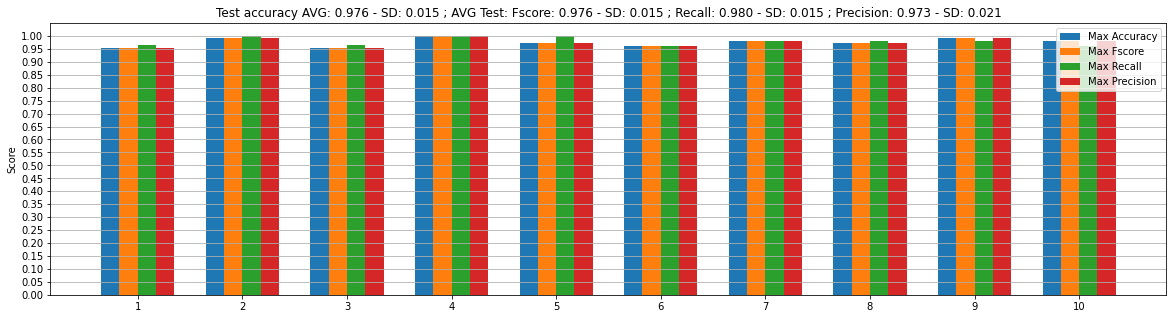

In [4]:
plot.plot_bar(2,"openML","10_cv","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["120"])

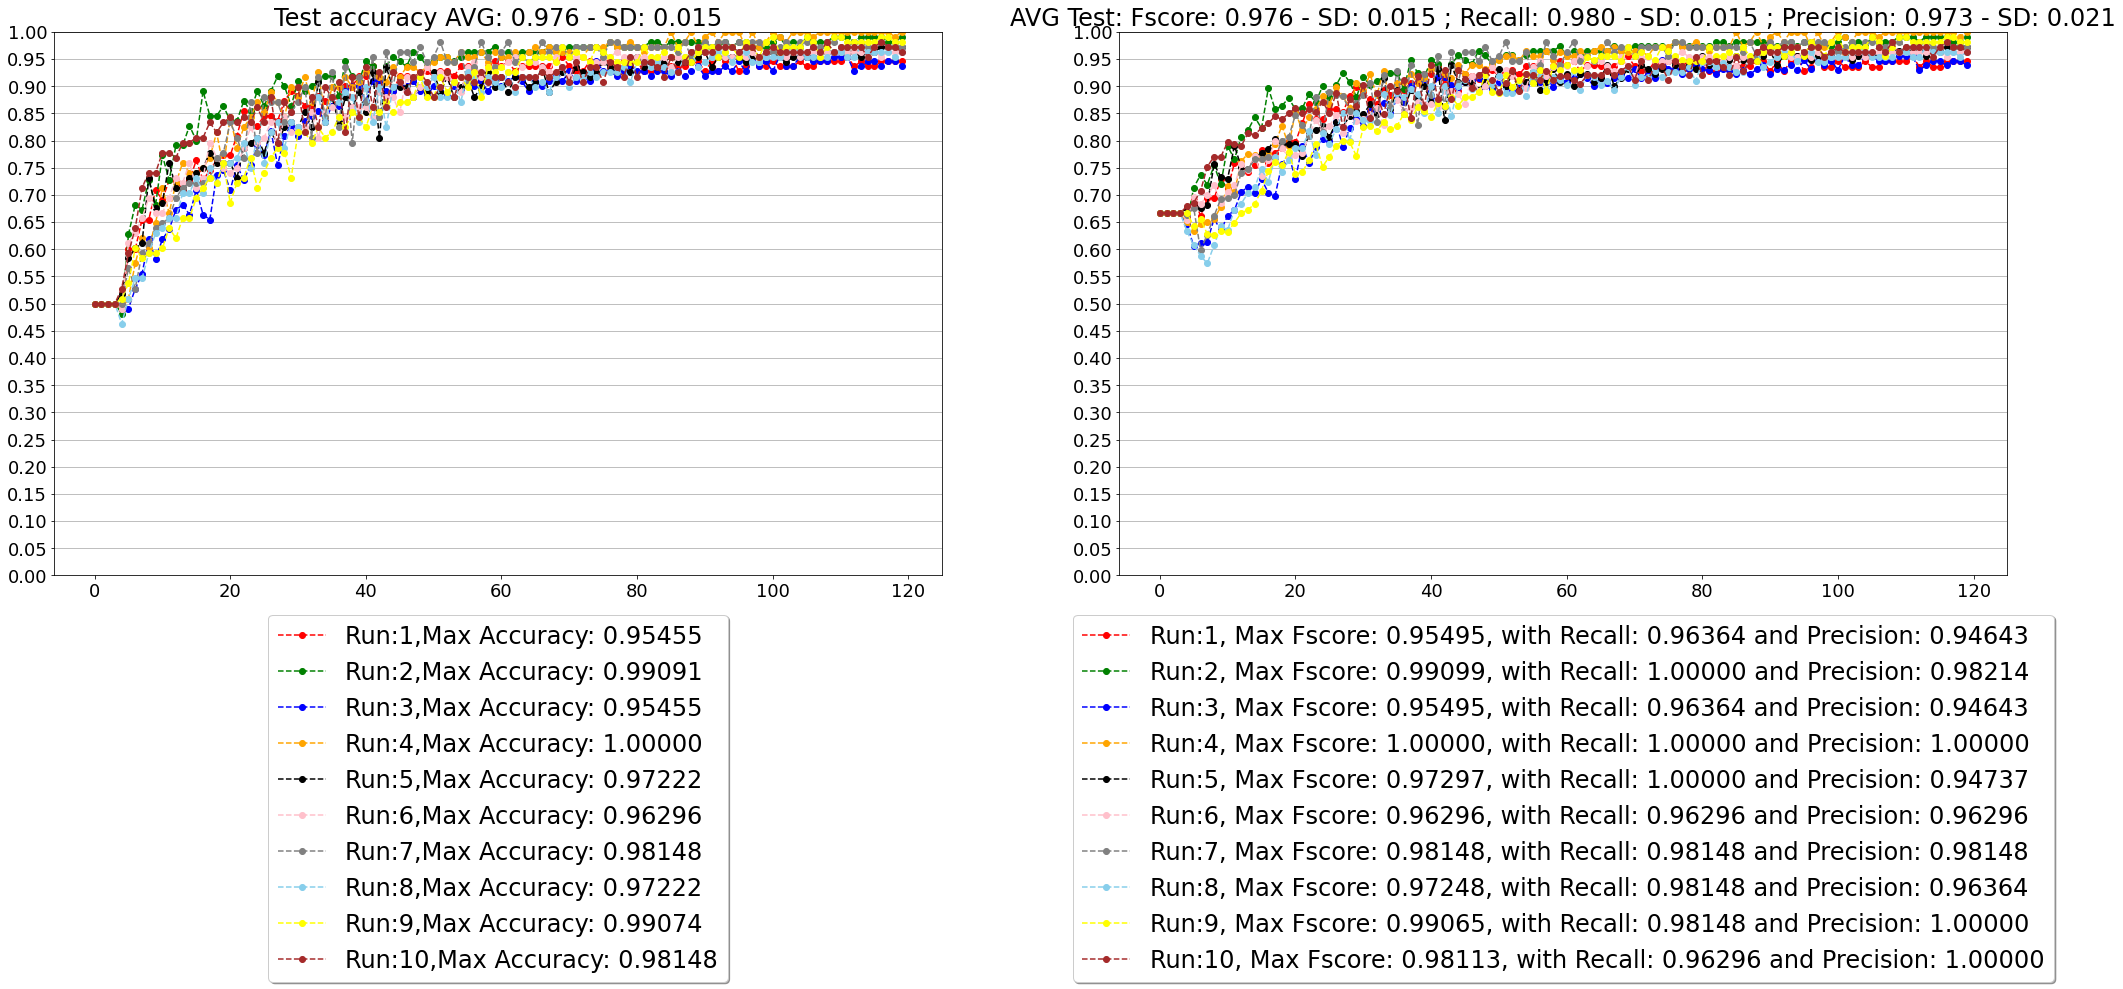

In [5]:
plot.plot_cv_details(2,"openML","10_cv","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["120"])